Subimos los 3 archivos:

- enron1spam_ham_pedro.csv
- gitHub_spam_pedro.csv
- spambase_pedro.csv

In [ ]:
from google.colab import files

# Subir el archivo desde tu escritorio a Google Colab
uploaded = files.upload()

# Obtener la ruta del archivo cargado
for nombre_archivo in uploaded.keys():
    ruta_archivo = nombre_archivo
    #print(ruta_archivo)

#uploaded es un dict
#print(type(uploaded))
#print(uploaded)

Saving _enron1spam_ham_pedro.csv to _enron1spam_ham_pedro.csv
Saving _gitHub_spam_pedro.csv to _gitHub_spam_pedro.csv
Saving _spambase_pedro.csv to _spambase_pedro.csv


Los convertimos a dataframe

In [ ]:
import io
import pandas as pd

# Lee el archivo CSV con la primera fila como cabecera
#df1 = pd.read_csv(io.BytesIO(uploaded['gitHub_spam_pedro.csv']))
df1 = pd.read_csv('gitHub_spam_pedro.csv')

#df2 = pd.read_csv(io.BytesIO(uploaded['enron1spam_ham_pedro.csv']))
df2 = pd.read_csv('enron1spam_ham_pedro.csv')

#df3 = pd.read_csv(io.BytesIO(uploaded['spambase_pedro.csv']))
df3 = pd.read_csv('spambase_pedro.csv')

#print(df1.shape)
#print(df2.shape)
#print(df3.shape)

#columna = df1['Class']
#columna = df1.iloc[:, 57]
#print(columna)

Si hacemos la prueba 1 comentamos la prueba 2 y viceversa.

En la prueba 1 usamos los 3 ficheros pero quitamos 3 características.

En la prueba 2 no usamos el fichero de Enron.

In [ ]:
# Prueba 1 (Uso los 3 ficheros pero 54 de 57 caracteristicas,
# ya que uno de los ficheros solo usa minusculas)

# Concatenar los tres DataFrames en uno solo
df = pd.concat([df1, df2, df3], ignore_index=True)
#print(df)

# Eliminar las 3 columnas de caracteristicas de mayusculas
df_sin_mayusculas = df.drop('capital_run_length_average', axis = 1)
df_sin_mayusculas = df_sin_mayusculas.drop('capital_run_length_longest', axis = 1)
df_sin_mayusculas = df_sin_mayusculas.drop('capital_run_length_total', axis = 1)
#print(df_sin_mayusuculas)

# # Prueba 2 (Uso 2 ficheros y uso las 57 caracteristicas)
# df_prueba2 = pd.concat([df1, df3], ignore_index=True)

De nuevo, si hacemos la prueba 1 comentamos la prueba 2 y viceversa.

Aquí separamos los datos en entrenamiento y pruebas.

In [ ]:
from sklearn.model_selection import train_test_split

# Dividir los datos en conjuntos de entrenamiento y prueba
# Prueba 1
train_df, test_df = train_test_split(df_sin_mayusculas, test_size=0.2, random_state=42)

# Prueba 2
#train_df, test_df = train_test_split(df_prueba2, test_size=0.2, random_state=42)

# Separar las características (X) y las etiquetas (y) del conjunto de entrenamiento y prueba
X_train = train_df.drop('Class', axis = 1)
y_train = train_df['Class']

X_test = test_df.drop('Class', axis = 1)
y_test = test_df['Class']

#print(X_test)

Normalizamos los datos.

In [ ]:
from sklearn.preprocessing import StandardScaler

# Escalar los datos (es importante escalar los datos para que
# tengan una media de 0 y una desviación estándar de 1)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Defino el modelo. Sólo seleccionamos uno, los demás los comentamos.

In [ ]:
import tensorflow as tf

# Definir el modelo MLP (Perceptron multicapa)
# Se agrega una capa (de entrada) densa totalmente conectada con 64 neuronas y activación ReLU,
# con tamaño de entrada 57 (X_train_scaled.shape[1])
# Se agrega otra capa densa con 32 neuronas y la misma función de activación ReLU
# Se agrega la capa de salida. Esta capa tiene una sola neurona, ya que estamos realizando
# una clasificación binaria

# Modelo 1
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# # Modelo 2 Con una capa más
# model = tf.keras.models.Sequential([
#     tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
#     tf.keras.layers.Dense(64, activation='relu'),
#     tf.keras.layers.Dense(32, activation='relu'),
#     tf.keras.layers.Dense(1, activation='sigmoid')
# ])

# # Modelo 3 Con regularizador
# from tensorflow.keras.regularizers import l2
# model = tf.keras.models.Sequential([
#     tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=l2(0.001), input_shape=(X_train_scaled.shape[1],)),
#     tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=l2(0.001)),
#     tf.keras.layers.Dense(32, activation='relu', kernel_regularizer=l2(0.001)),
#     tf.keras.layers.Dense(1, activation='sigmoid')
# ])

# # Modelo 4 Con Dropout
# model = tf.keras.models.Sequential([
#     tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
#     tf.keras.layers.Dropout(0.5),
#     tf.keras.layers.Dense(64, activation='relu'),
#     tf.keras.layers.Dropout(0.5),
#     tf.keras.layers.Dense(32, activation='relu'),
#     tf.keras.layers.Dense(1, activation='sigmoid')
# ])


Compilamos el modelo.

In [ ]:
# Compilar el modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Entrenamos el modelo.

In [ ]:
# Entrenar el modelo
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.2)
print("Ya")

Epoch 1/100
204/204 [==============================] - 2s 4ms/step - loss: 0.4947 - accuracy: 0.8825 - val_loss: 0.4247 - val_accuracy: 0.9048
Epoch 2/100
204/204 [==============================] - 1s 3ms/step - loss: 0.3848 - accuracy: 0.9054 - val_loss: 0.3742 - val_accuracy: 0.9023
Epoch 3/100
204/204 [==============================] - 1s 3ms/step - loss: 0.3411 - accuracy: 0.9086 - val_loss: 0.3513 - val_accuracy: 0.9060
Epoch 4/100
204/204 [==============================] - 1s 3ms/step - loss: 0.3132 - accuracy: 0.9138 - val_loss: 0.3375 - val_accuracy: 0.9023
Epoch 5/100
204/204 [==============================] - 1s 3ms/step - loss: 0.2945 - accuracy: 0.9158 - val_loss: 0.3469 - val_accuracy: 0.8999
Epoch 6/100
204/204 [==============================] - 1s 4ms/step - loss: 0.2827 - accuracy: 0.9190 - val_loss: 0.3247 - val_accuracy: 0.9036
Epoch 7/100
204/204 [==============================] - 1s 4ms/step - loss: 0.2711 - accuracy: 0.9190 - val_loss: 0.3016 - val_accuracy: 0.9115

Mostramos la gráfica de la pérdida.

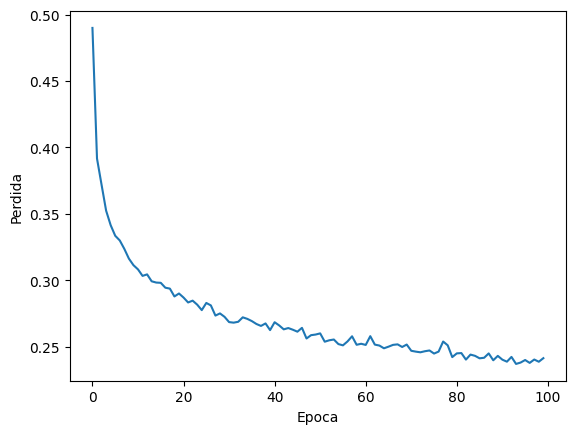

In [ ]:
import matplotlib.pyplot as plt
plt.xlabel("Epoca")
plt.ylabel("Perdida")
plt.plot(history.history["loss"])

Mostramos la gráfica de la precisión.

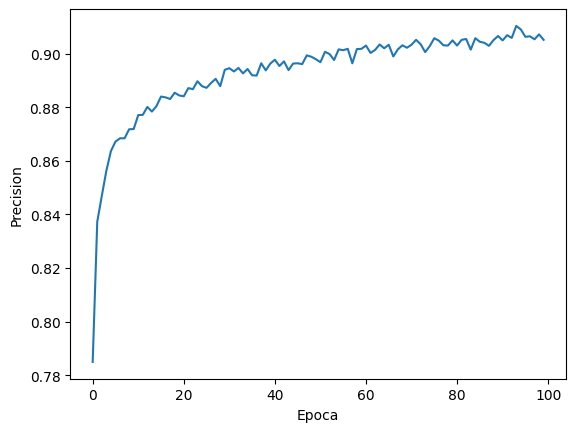

In [ ]:
plt.xlabel("Epoca")
plt.ylabel("Precision")
plt.plot(history.history["accuracy"])

Vemos como es la pérdida y la precisión en los datos de prueba.

In [ ]:
# Evaluar el modelo en el conjunto de prueba
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f'Loss en el conjunto de prueba: {loss}')
print(f'Accuracy en el conjunto de prueba: {accuracy}')

64/64 [==============================] - 0s 2ms/step - loss: 0.2528 - accuracy: 0.9224
Loss en el conjunto de prueba: 0.2527841031551361
Accuracy en el conjunto de prueba: 0.9223587512969971


Aquí hacemos tres predicción de prueba.

Las hacemos con los datos normalizados o sin normalizar, para ver si varía.

Lo predicción correcta sería Sí, Sí, No.

In [ ]:
import numpy as np

#Spam
pruebaSpam = [0,0.64,0.64,0,0.32,0,0,0,0,0,0,0.64,0,0,0,0.32,0,1.29,1.93,0,0.96,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,778,0,0,3.756,61,278]
pruebaSpam2 = [0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.57,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.64,0.0,0.0,0.0,0.0,1.25,2,10]

#No Spam
pruebaNoSpam = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,22,22,19,22,22,22,3.482,5,5.902]

# Convertir la lista de valores en un array numpy
matrizPruebaSpam = np.array(pruebaSpam).reshape(1, -1)  # reshape para convertirlo en una matriz de una fila
matrizPruebaSpam2 = np.array(pruebaSpam2).reshape(1, -1)  # reshape para convertirlo en una matriz de una fila
matrizPruebaNoSpam = np.array(pruebaNoSpam).reshape(1, -1)  # reshape para convertirlo en una matriz de una fila

# Lista de nombres de características
nombres_columnas = [
    'word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d', 'word_freq_our',
    'word_freq_over', 'word_freq_remove', 'word_freq_internet', 'word_freq_order', 'word_freq_mail',
    'word_freq_receive', 'word_freq_will', 'word_freq_people', 'word_freq_report', 'word_freq_addresses',
    'word_freq_free', 'word_freq_business', 'word_freq_email', 'word_freq_you', 'word_freq_credit',
    'word_freq_your', 'word_freq_font', 'word_freq_000', 'word_freq_money', 'word_freq_hp', 'word_freq_hpl',
    'word_freq_george', 'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet', 'word_freq_857',
    'word_freq_data', 'word_freq_415', 'word_freq_85', 'word_freq_technology', 'word_freq_1999', 'word_freq_parts',
    'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting', 'word_freq_original',
    'word_freq_project', 'word_freq_re', 'word_freq_edu', 'word_freq_table', 'word_freq_conference',
    'char_freq_;', 'char_freq_(', 'char_freq_[', 'char_freq_!', 'char_freq_$', 'char_freq_#',
    'capital_run_length_average', 'capital_run_length_longest', 'capital_run_length_total'
]

# Crear un DataFrame de Pandas con la matriz y los nombres de columnas
df_matriz_prueba_spam = pd.DataFrame(data=matrizPruebaSpam, columns=nombres_columnas)
df_matriz_prueba_spam2 = pd.DataFrame(data=matrizPruebaSpam2, columns=nombres_columnas)
df_matriz_prueba_no_spam = pd.DataFrame(data=matrizPruebaNoSpam, columns=nombres_columnas)

#Escalar los datos
matrizPruebaSpamEscalada = scaler.transform(df_matriz_prueba_spam)
matrizPruebaSpam2Escalada = scaler.transform(df_matriz_prueba_spam2)
matrizPruebaNoSpamEscalada = scaler.transform(df_matriz_prueba_no_spam)

prediccion1 = model.predict(matrizPruebaSpamEscalada)[0][0]
prediccion2 = model.predict(matrizPruebaSpam2Escalada)[0][0]
prediccion3 = model.predict(matrizPruebaNoSpamEscalada)[0][0]

prediccion1a = model.predict(df_matriz_prueba_spam)[0][0]
prediccion2a = model.predict(matrizPruebaSpam2Escalada)[0][0]
prediccion3a = model.predict(matrizPruebaNoSpamEscalada)[0][0]

# Clasificación
def clasificar_spam(prediccion):
    if prediccion > 0.5:
        return "Es spam"
    else:
        return "No es spam"

# Datos escalados
print("Predicción 1:", clasificar_spam(prediccion1), prediccion1)
print("Predicción 2:", clasificar_spam(prediccion2), prediccion2)
print("Predicción 3:", clasificar_spam(prediccion3), prediccion3)

# Sin escalar los datos
print("Predicción 1a:", clasificar_spam(prediccion1a), prediccion1a)
print("Predicción 2a:", clasificar_spam(prediccion2a), prediccion2a)
print("Predicción 3a:", clasificar_spam(prediccion3a), prediccion3a)
# Lo correcto seria Si, Si, No
# Predijo No, Si, No


1/1 [==============================] - 0s 21ms/step
Predicción 1: No es spam 0.0
Predicción 2: Es spam 0.99835294
Predicción 3: No es spam 0.46026704
Predicción 1a: No es spam 0.46026704
Predicción 2a: Es spam 0.99835294
Predicción 3a: No es spam 0.46026704


Guardamos el modelo en formato .h5

También se puede guardar en distintos formatos, pero después pueden surgir problemas que no hemos resuelto.

In [ ]:
#En formato h5 (aunque dice obsoleto funciona bien)
model.save("modelo_pedro.h5")

#En formato Keras
#model.save("modelo_pedro.keras")

#En formato SavedModel
#tf.saved_model.save(model, "modelo_pedro")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Instalamos tensorflowjs

In [ ]:
!pip install tensorflowjs

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.1/89.1 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.5/15.5 MB 37.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 74.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 78.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 85.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 91.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 56.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 34.3 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 24.0
    Uninstalling packaging-24.0:
      Successfully uninstalled packaging-24.0
  Attempting uninstall: ml-dtypes
    

Aquí comprobamos que el modelo se carga bien.

In [ ]:
from tensorflow import keras
# Comprobaciones sobre el modelo

# Formato h5
modelo_cargado = load_model('modelo_pedro.h5')
print(modelo_cargado.summary())

# Formato keras
# modelo_cargado = keras.models.load_model('modelo_pedro.keras')
# print(modelo_cargado.summary())

# # Formato SavedModel
# modelo_cargado = tf.saved_model.load("modelo_pedro")

# # Obtén la firma del modelo
# signature = list(modelo_cargado.signatures.values())[0]

# # Muestra los nombres de los nodos de entrada y salida del modelo
# print(signature.inputs)
# print(signature.outputs)

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:415: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 8 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 64)                  │           3,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,652 (45.52 KB)

 Trainable params: 5,825 (22.75 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,827 (22.77 KB)

None


Creamos nuestra carpeta para guardar el modelo final exportado.

In [ ]:
!mkdir carpeta_modelo_pedro_h5_js
#!mkdir carpeta_modelo_pedro_keras_js

Exportamos el modelo a un formato válido para su uso en javascript.

In [ ]:
#!pip show keras

!tensorflowjs_converter --input_format=keras \
                       modelo_pedro.h5 \
                       carpeta_modelo_pedro_h5_js

# !tensorflowjs_converter --input_format=keras \
#                         modelo_pedro.keras \
#                         carpeta_modelo_pedro_keras_js

# !tensorflowjs_converter --input_format=tf_saved_model \
#                        --output_node_names='Identity' \
#                        modelo_pedro \
#                        carpeta_modelo_pedro_js

2024-05-03 10:13:44.435168: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-03 10:13:46.510297: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Recordad que una vez tengamos nuestro archivo index.html que use el modelo para hacer predicciones, si queremos probarlo debemos lanzar el comando:

python -m http.server 8000

desde la línea de comandos de nuestro ordenador.